# Atividade 2
O dataset utilizado nessa atividade é relacionado a jogos de xadrez realizados em uma plataforma de jogos online na qual é análisado a cor, "white" ou "black", que mais venceu partidas. A plataforma de jogos está disponível em:
https://lichess.org/.

O link para acesso do dataset utilizado é: https://www.kaggle.com/datasnaek/chess

Durante essa atividade foi utilizado um dataset que foi adaptado a utilizar variável de Bernoulli e através dele foi realizada as seguintes tarefas:

*   Realizar os 3 tipos de amostra(Aleatória, Estratificada e Sistemática)
*   Calcular p e q, média e desvio padrão para a variável de Bernoulli
*   Modelar a distribuição de probabilidade Binomial para a variável em n tentativas




In [ ]:
# Importanto bibliotecas e o dataset
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/vannisson/Atv-EP/main/games.csv"
aux = pd.read_csv(url,usecols=[6])
vencedor = aux['winner'].tolist()

#Agora temos nossa lista, porém precisamos remover o estado "draw" para que ela se torne Bernoulli
#A função "remove" exclui apenas uma ocorrência, então usamos o while para fazer isso enquanto houver "draw" na lista
while "draw" in vencedor:
  vencedor.remove("draw")

#Depois de remover o draw temos uma li
len(vencedor)

19108

# Realizando as amostras
* Amostra aleatória


In [ ]:
amostra_aleatoria = random.sample(vencedor,50)
amostra_aleatoria


* Amostra Estratificada

In [ ]:
amostra_estratificada = []
amostra_estratificada.append(random.sample(vencedor,50))
amostra_estratificada.append(random.sample(vencedor,50))
amostra_estratificada.append(random.sample(vencedor,50))

amostra_estratificada

* Amostra Sistemática

In [ ]:
amostra_selecionada = [vencedor[i] for i in range(0,19108,50)]
amostra_selecionada

# Calculando dados estatísticos da variável de Bernoulli

Para facilitar a utilização dos dados em cálculos iremos assumir o seguinte:

* Se for "white" então assume o valor 0;
* Se for "black" então assume o valor 1;

e para isso percorreremos nossos dados e criaremos uma nova lista, mas com os atributos que escolhemos.





In [ ]:
lista_formatada = []
for i in range(len(vencedor)):
  if vencedor[i] == "white":
    lista_formatada.append(0)
  elif vencedor[i] == "black":
    lista_formatada.append(1)
lista_formatada

## Descobrindo p e q
* p representa "white";
* q representa "black";

In [ ]:
p = 0
q = 0
for i in lista_formatada:
  if i == 0:
    p += 1
  elif i == 1:
    q += 1
p = p / len(lista_formatada)
q = q / len(lista_formatada)
p,q

(0.5233933431023655, 0.4766066568976345)

*   Média;




In [ ]:
media = 0
for i in lista_formatada:
  media += i
media = round(media/len(lista_formatada),2)
media

0.48

*   Desvio padrão;

In [ ]:
# Calculando a variância para depois fazer o desvio padrão
variancia = 0
for i in lista_formatada:
  variancia += (i - media)**2
variancia = variancia/len(lista_formatada)

# Agora iremos calcular o desvio padrão
desvio = variancia**(1/2)

variancia, desvio

(0.2494642662759152, 0.49946397895735706)

# Distribuição de probabilidade Binomial

* Criando uma função para calcular o fatorial;

In [ ]:
# Função fatorial
def fatorial(num):
    fatorial = 1
    i = 2
    while i <= num:
        fatorial = fatorial*i
        i = i + 1
    return fatorial

* Agora uma função para calcular a probabilidade Binomial e calcular;

In [ ]:
def probBinomial(x,n,p,q):
  return (fatorial(n)/(fatorial(n-x)*fatorial(x)))*(p**x)*(q**(n-x))

n = 7
prob = []

for x in range(8):
  pi = probBinomial(x,n,p,q)
  prob.append(pi)
  print('P(',i,')=',pi)
  


P( 1 )= 0.00558625463168679
P( 1 )= 0.04294245393658692
P( 1 )= 0.14147386026786182
P( 1 )= 0.2589363633356916
P( 1 )= 0.2843551740112279
P( 1 )= 0.18736155234125115
P( 1 )= 0.06858471084385098
P( 1 )= 0.01075963063184291


In [ ]:
# Checando
np.sum(prob)


1.0

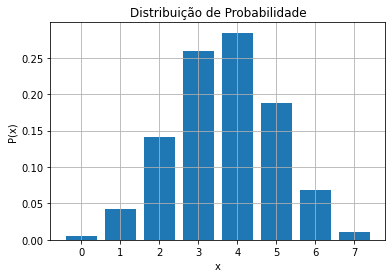

In [ ]:
# Fazendo o historgrama de frequência
x = [0,1,2,3,4,5,6,7]
plt.bar(x,prob)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Distribuição de Probabilidade')
plt.grid(True)
plt.show()